In [321]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import seaborn as sns
from sympy import false

# Adjust display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (use with caution for large DataFrames)
pd.set_option('display.width', None)        # Adjust console width to fit all columns
pd.set_option('display.max_colwidth', None) # Show full content of each column

Put the data into correct columns and rows

In [322]:
file_path = r"D:\IIT\2nd Year\CM2604 ML\Coursework\bank-full.csv"

# Create the CSV file data into correct columns
data = pd.read_csv(file_path, delimiter=';', quotechar='"')
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Try to get and idea about dataset

In [323]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [324]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(45211, 17)

Check if the data unbalance or not

<BarContainer object of 2 artists>

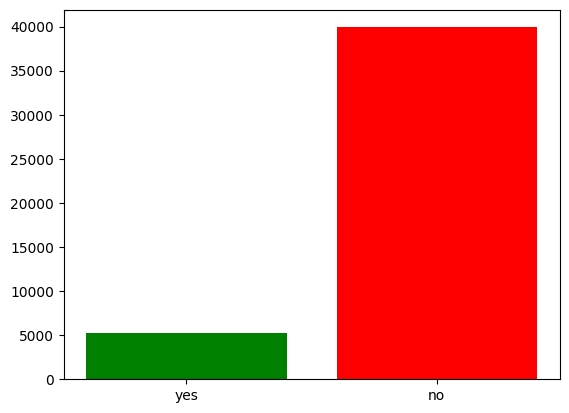

In [325]:

no_count = (data['y'] == 'no').sum()

yes_count = (data['y'] == 'yes').sum()

# plot the data unbalance
y = [yes_count,no_count]
x = ['yes','no']
plt.bar(x,y,color = ['green','red'])

Check the categorical features distribution

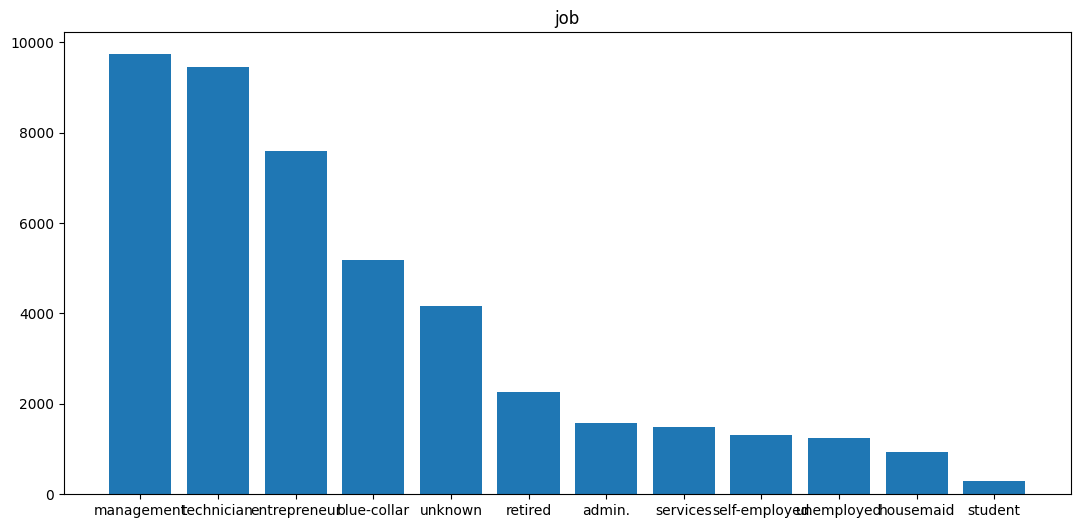

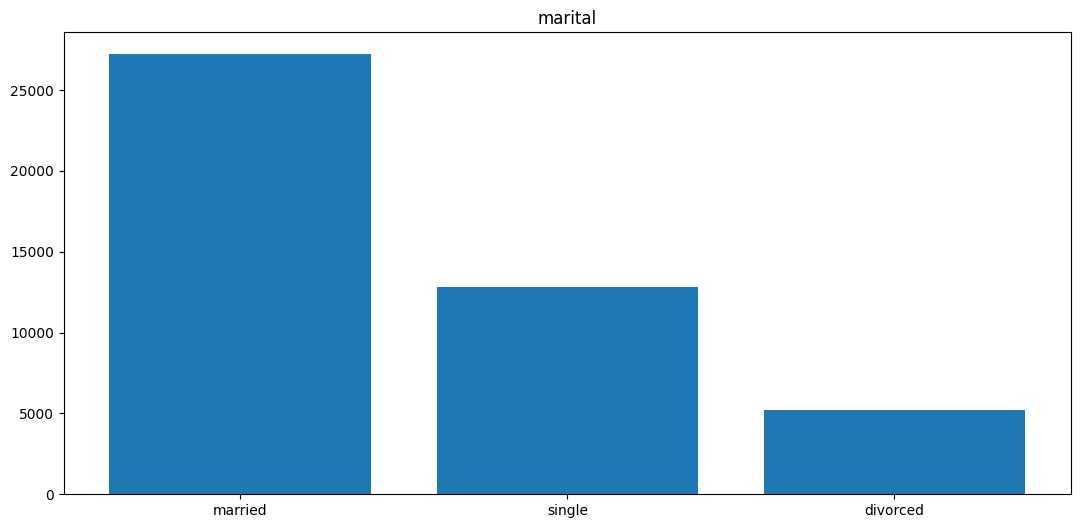

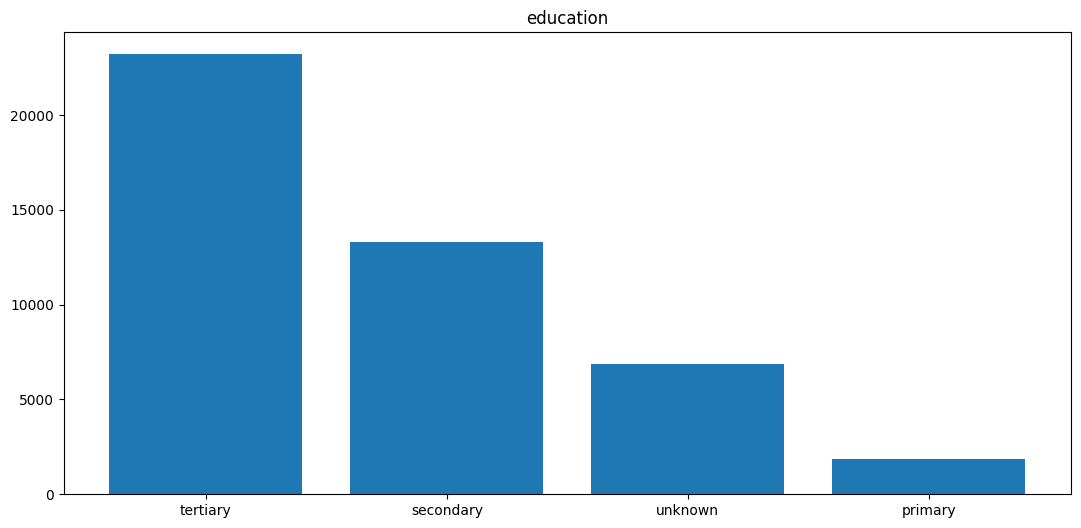

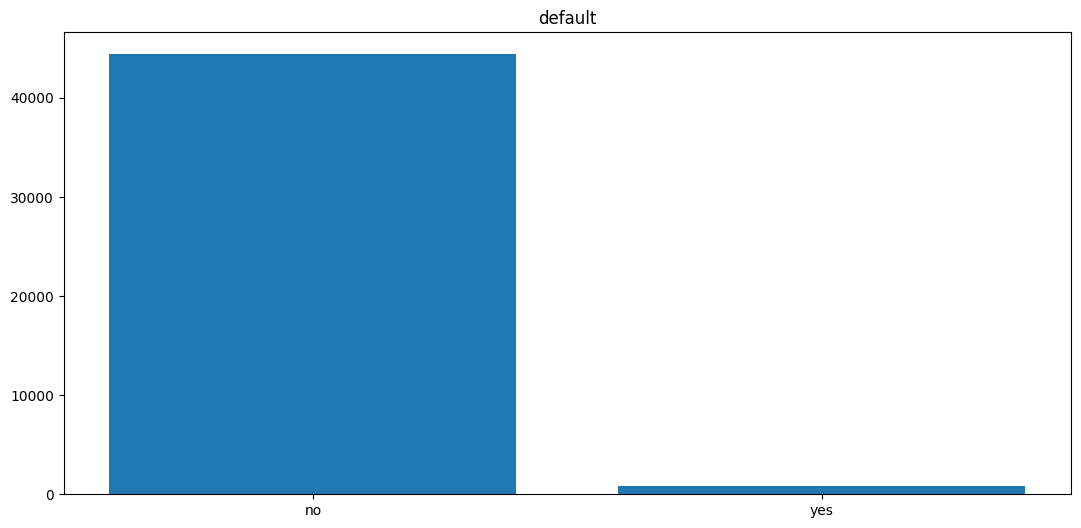

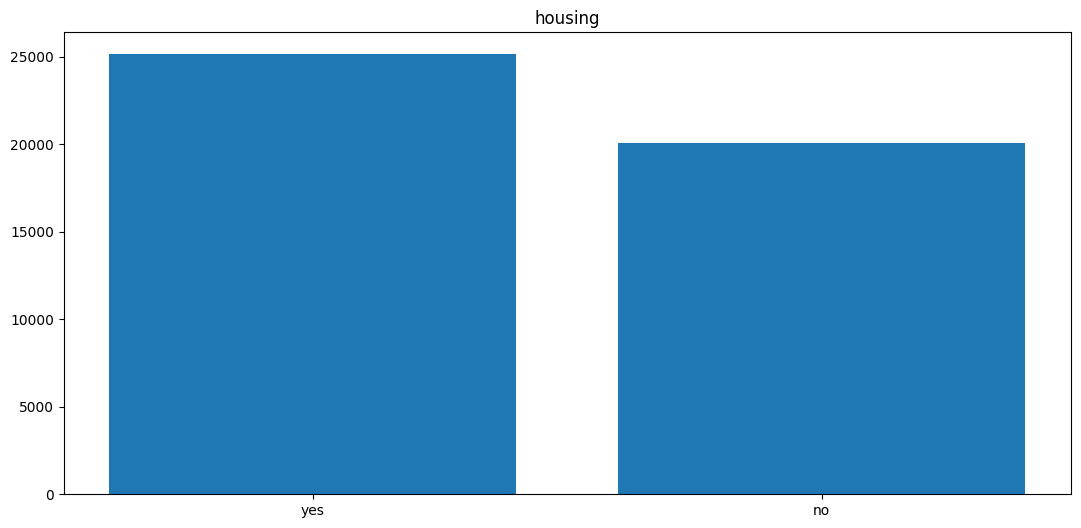

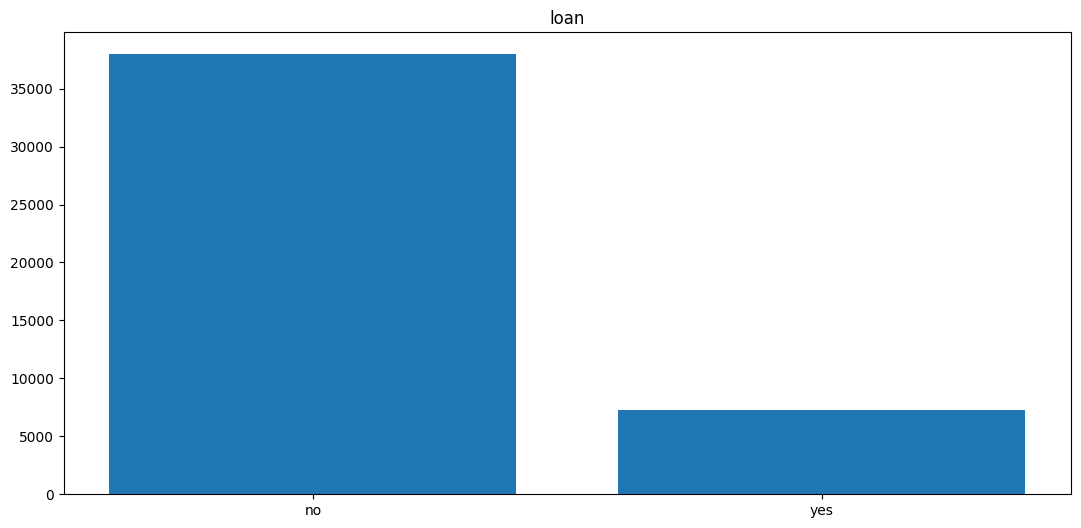

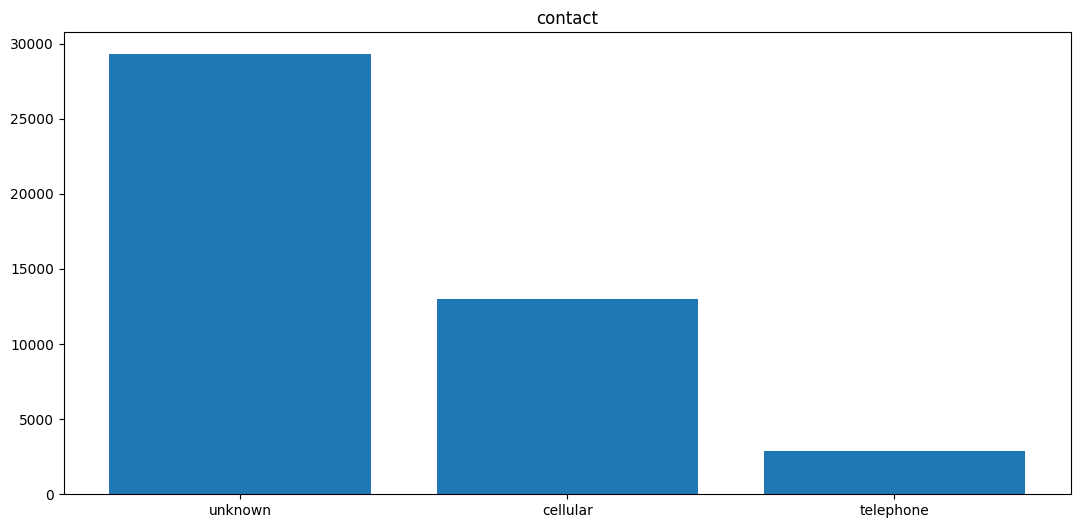

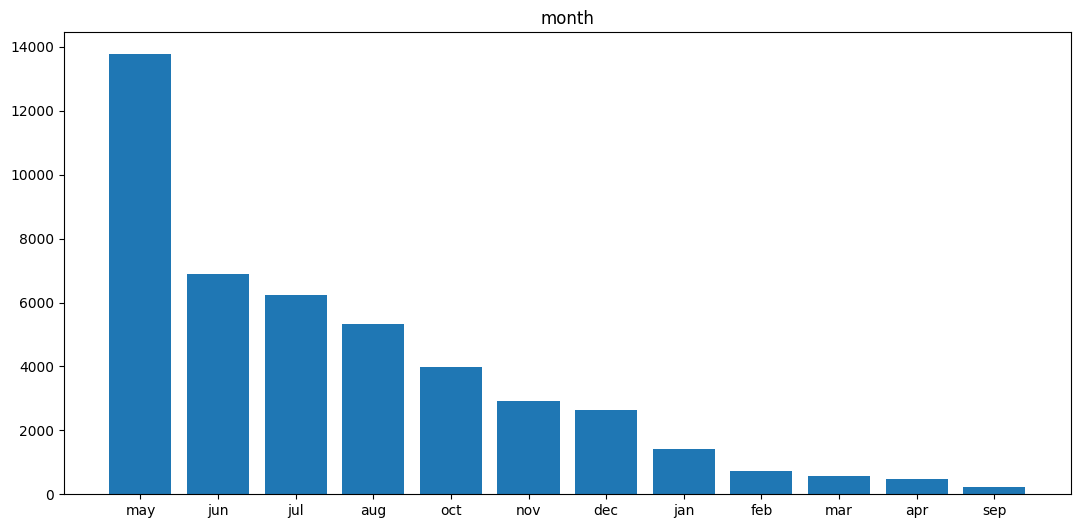

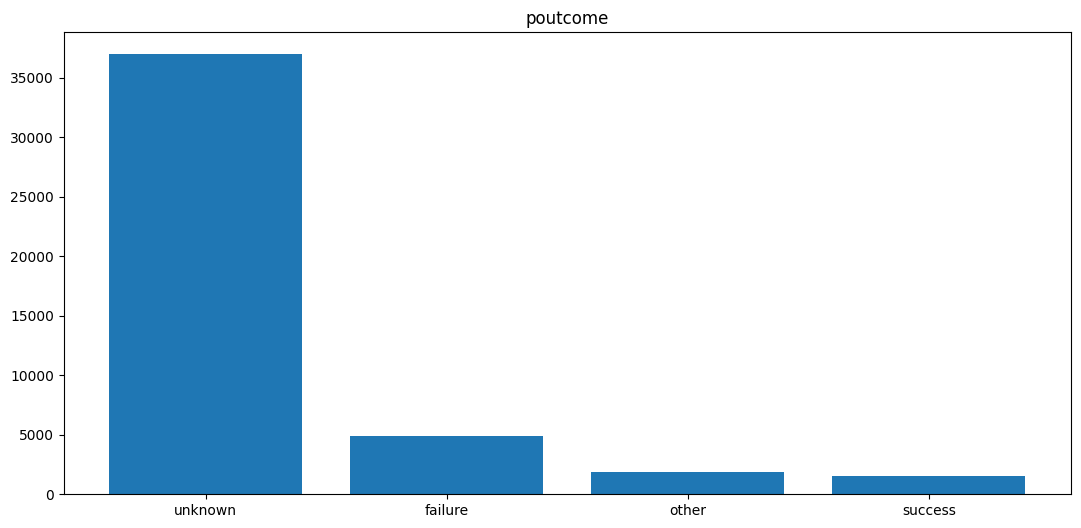

In [326]:

cat_features = []
for col in data.select_dtypes(include=object).columns:
    cat_features.append(col)

#removes the target column
cat_features.pop(-1)
cat_features

for cat_feature in cat_features:
    x = data[cat_feature].unique()
    y = data[cat_feature].value_counts()
    plt.figure(figsize=(13,6))
    plt.title(cat_feature)
    plt.bar(x,y)
    plt.show()

Relationship between categorical features and output

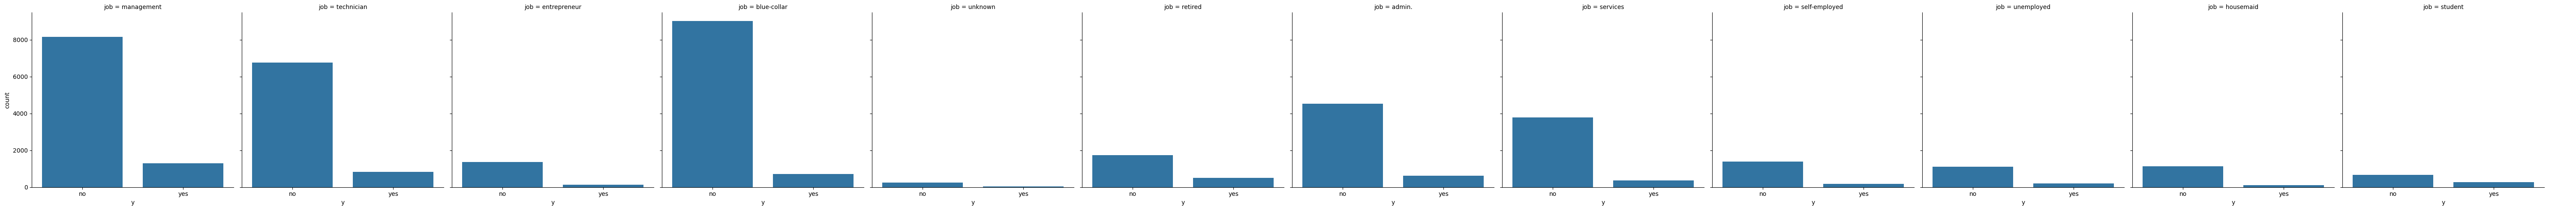

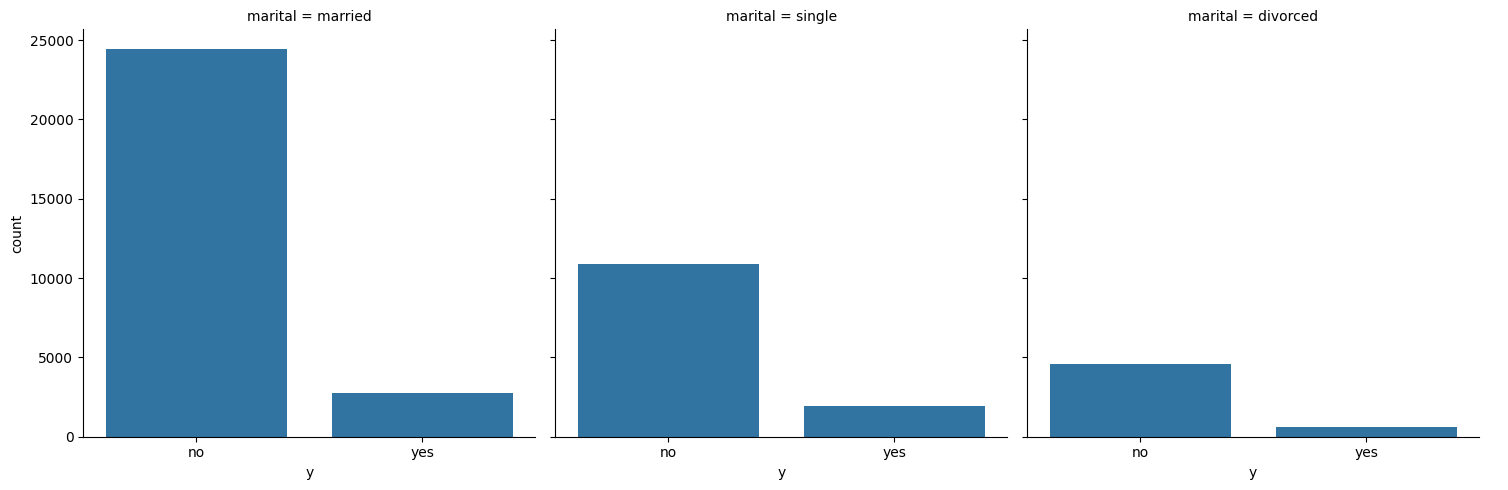

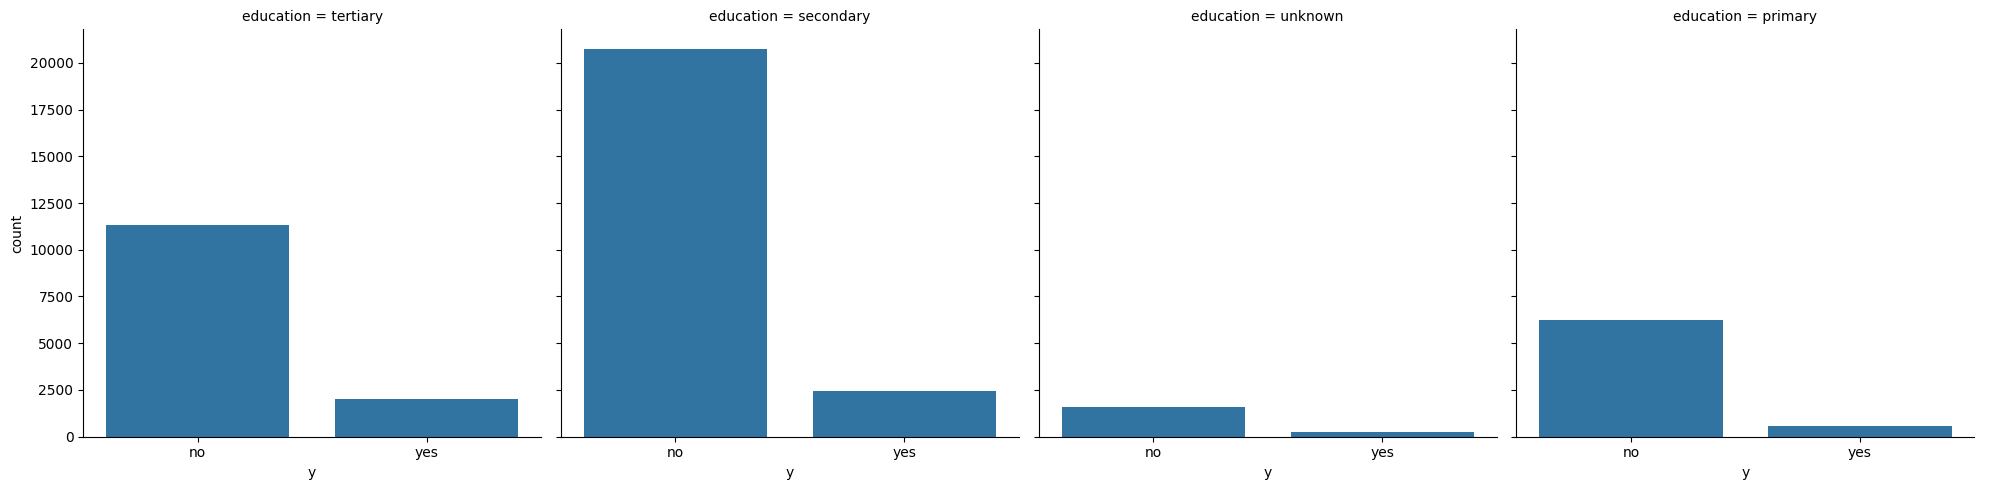

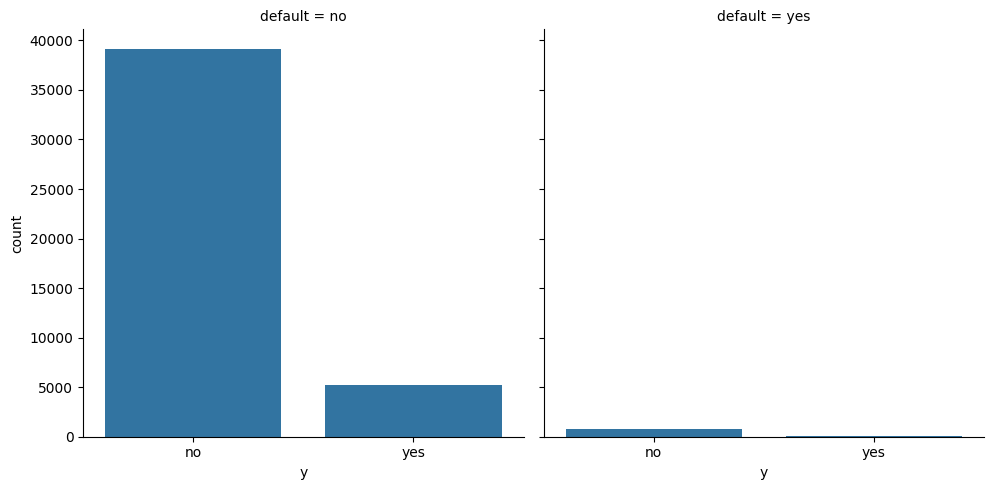

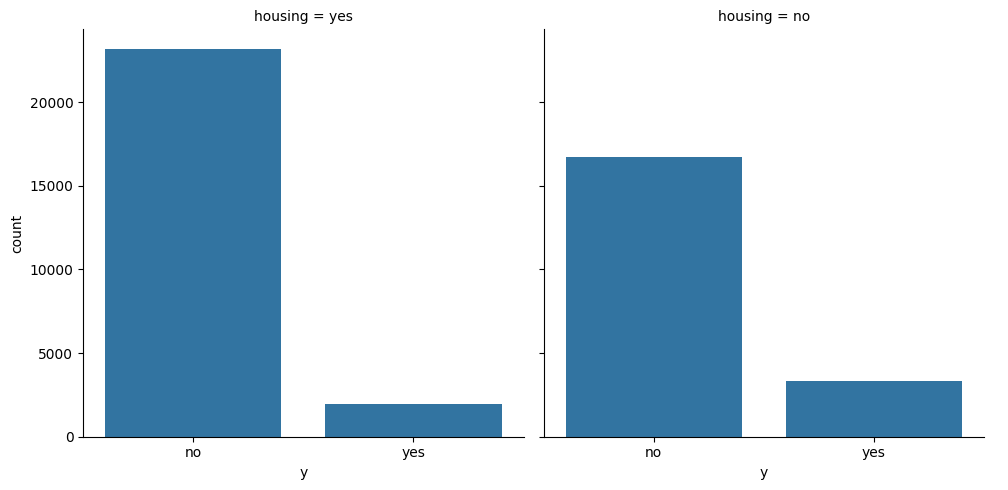

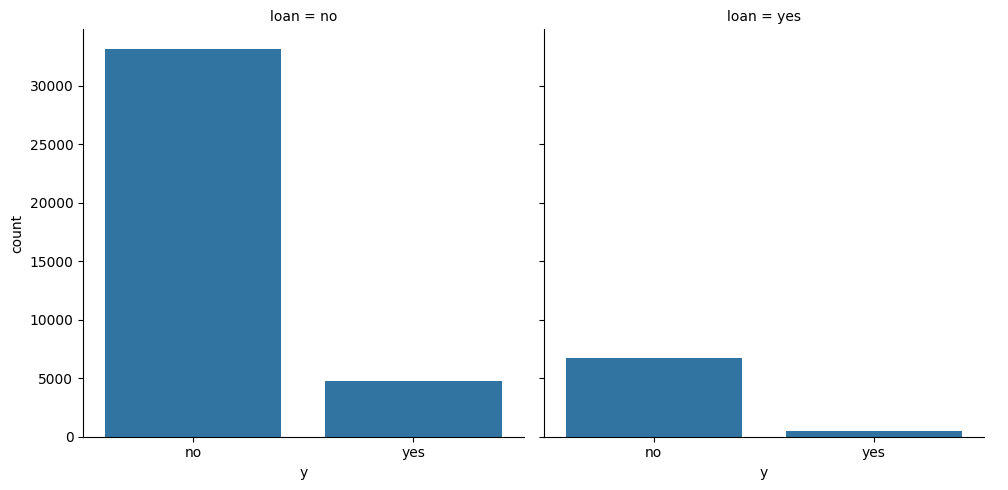

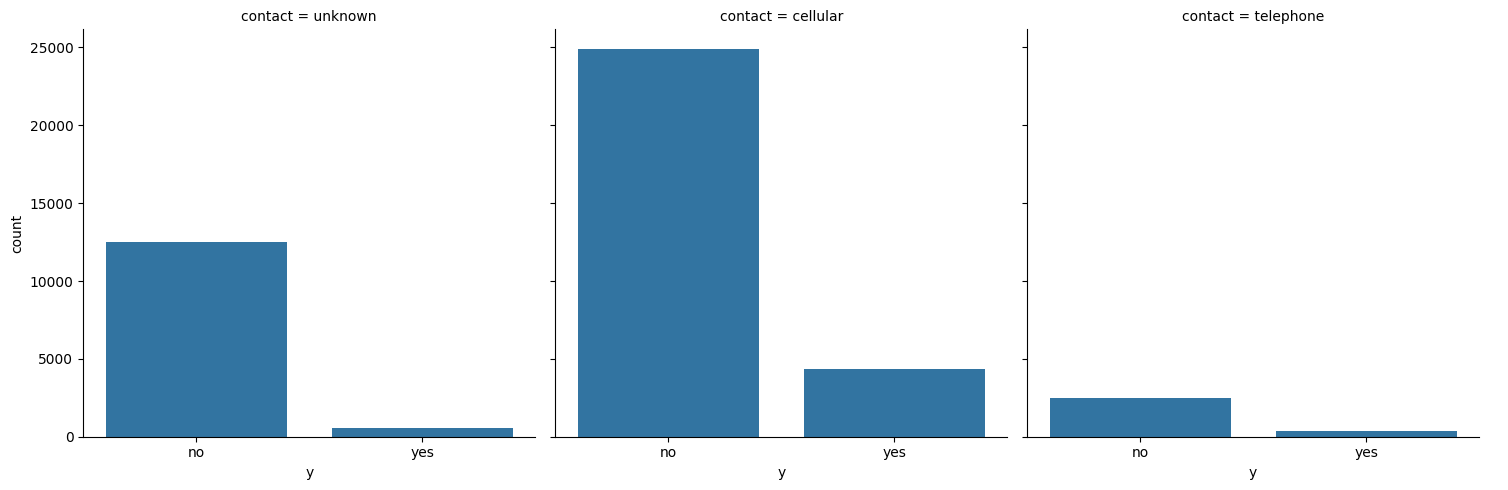

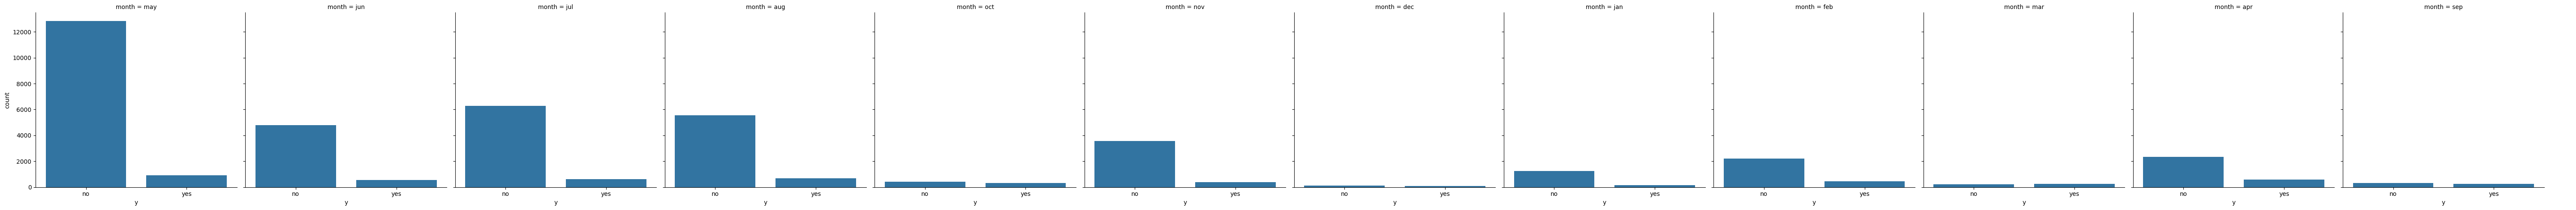

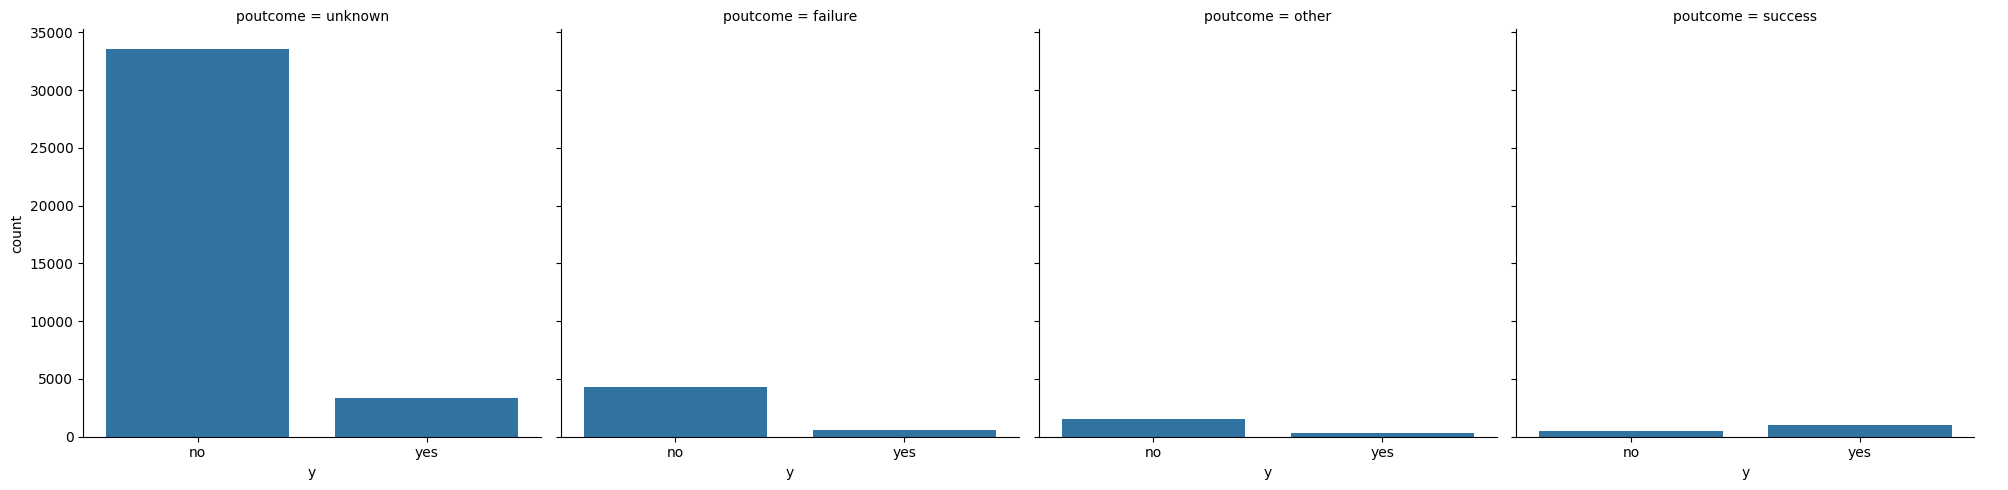

In [327]:
for cat_feature in cat_features:
    sns.catplot(x='y',col=cat_feature ,kind='count',data=data )

In [328]:
for cat_feature in cat_features:
    print(data.groupby(['y',cat_feature]).size())
    print(f"Maximum value :{data.groupby(['y',cat_feature]).size().max()}")
    print(f"Minimum value :{data.groupby(['y',cat_feature]).size().min()}")

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
Maximum value :9024
Minimum value :34
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
Maximum value :24459
Minimum value :622
y    education
no   primary       6260
     secondary    20752
     tertiary 

Analysing the numerical features

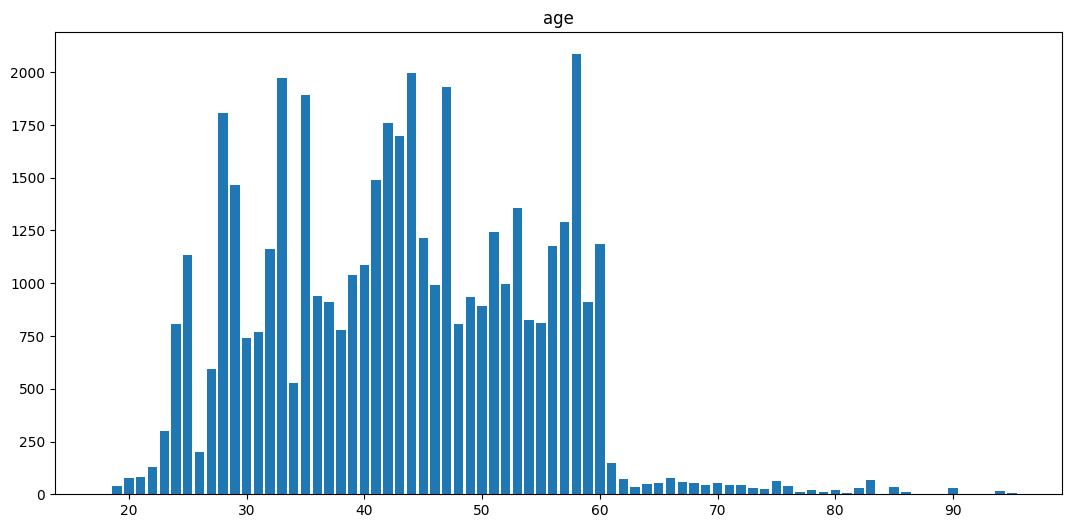

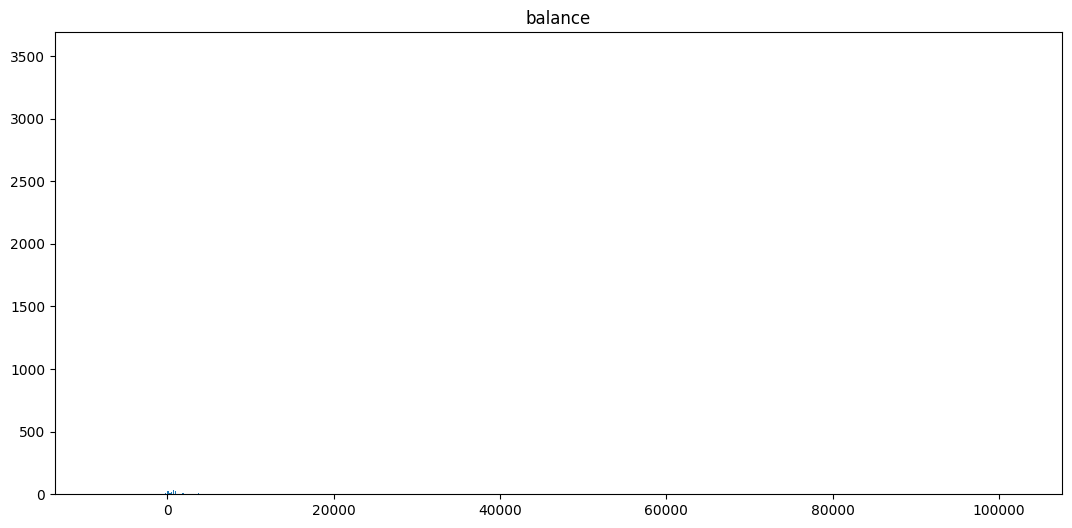

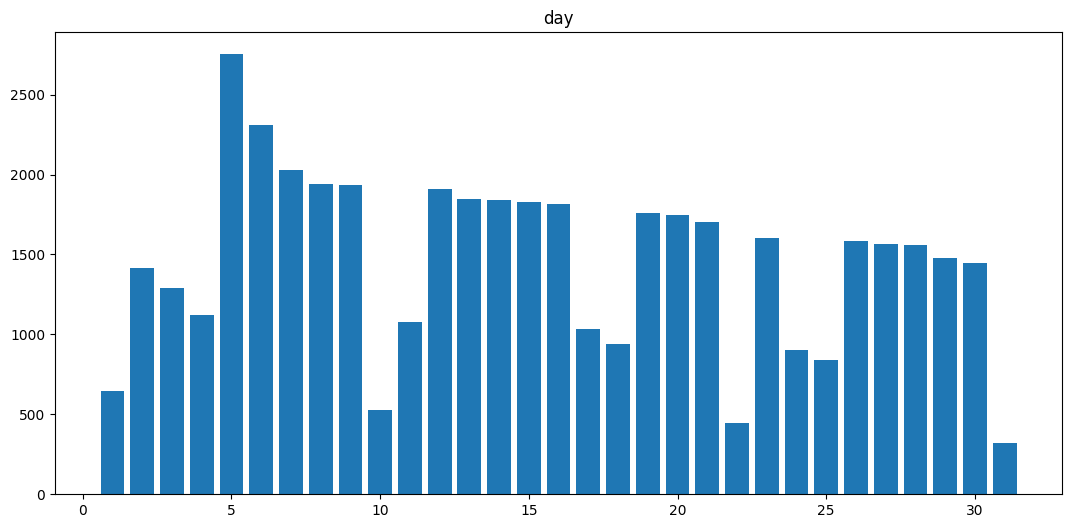

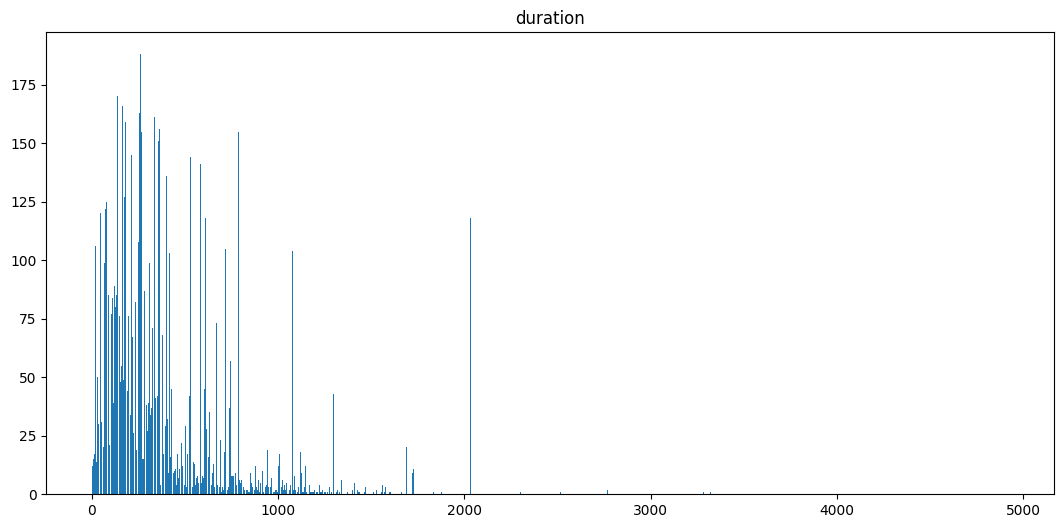

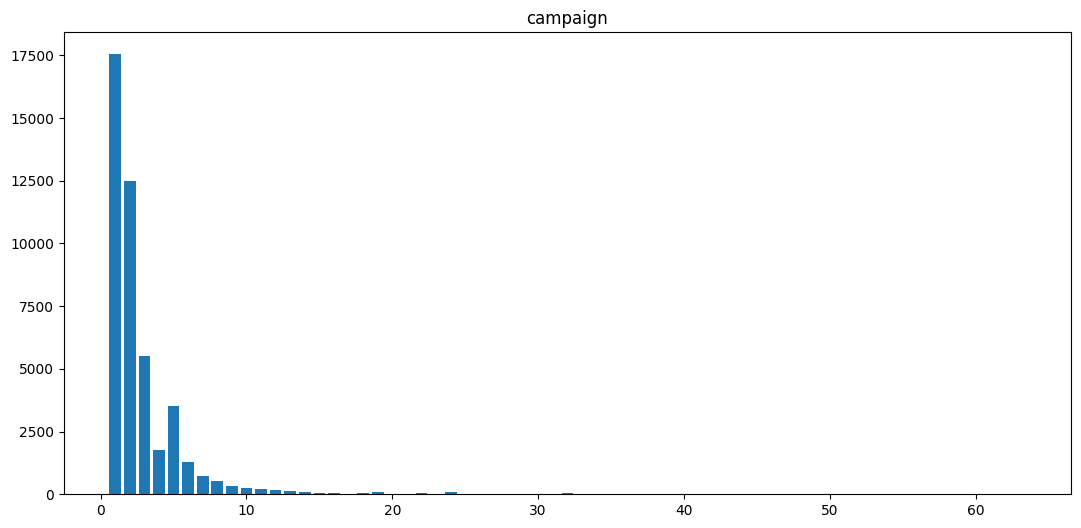

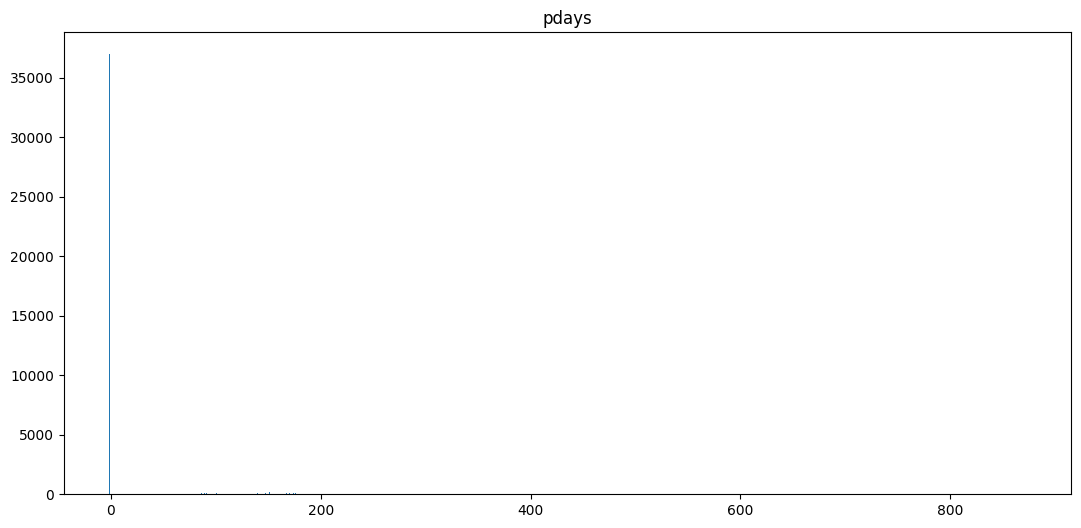

In [329]:
num_features = []
for col in data.select_dtypes(include='int64').columns:
    num_features.append(col)

#removes the target column
num_features.pop(-1)
num_features

for num_feature in num_features:
    x = data[num_feature].unique()
    y = data[num_feature].value_counts()
    plt.figure(figsize=(13,6))
    plt.title(num_feature)
    plt.bar(x,y)
    plt.show()

Checking for correlations

<Axes: >

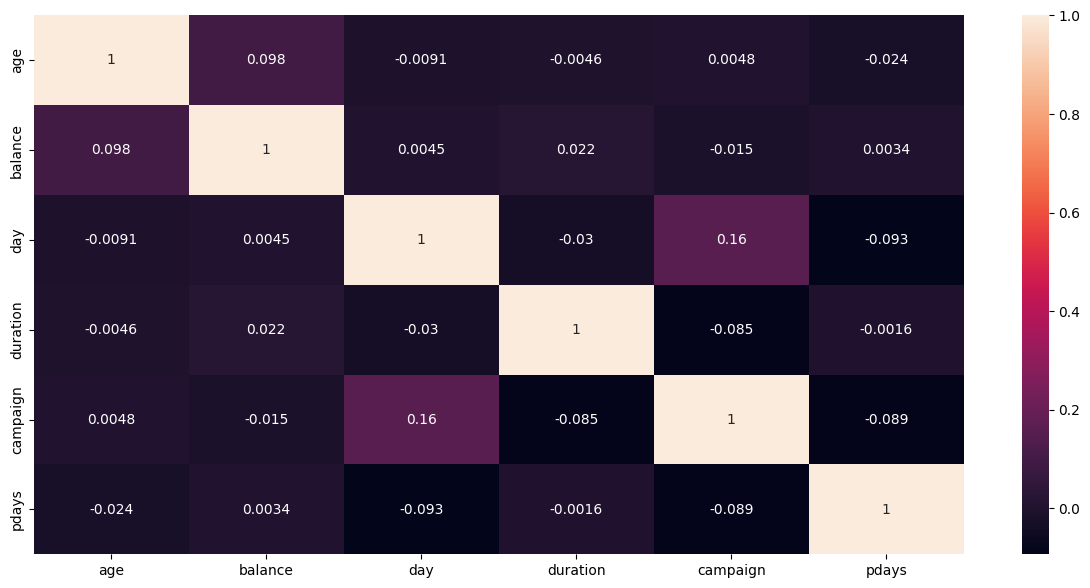

In [330]:
cor_matrix = data[num_features].corr(method="pearson")
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_matrix,annot=True)

Copy the data frame and starts to preprocess the dataset

In [331]:
df = data.copy()
df.shape

(45211, 17)

Drop the default feature because it is not doing much for the predictions

In [332]:
df.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

in here You can see out of 45211 raws 44 396 raws says "No" so that means this is more acts like single valued feature

In [333]:
df.drop(['default'],inplace=True,axis=1)
df.shape

(45211, 16)

Drop the pdays column because most of it values has -1

In [334]:
df.groupby(['y','pdays']).size()

negative_one_count = (df['pdays'] == -1).sum()
other_pdays = (df['pdays'] != -1).sum()
print((negative_one_count/45211)*(100))


81.73674548229414


In here there is more than 80 percenet of values has -1

In [335]:

df.drop(['pdays'],inplace=True,axis=1)
df.shape

(45211, 15)

check the outliers for age

In [336]:
df.groupby(['y','age'],sort=True)['age'].count()

y    age
no   18        5
     19       24
     20       35
     21       57
     22       89
     23      158
     24      234
     25      414
     26      671
     27      768
     28      876
     29     1014
     30     1540
     31     1790
     32     1864
     33     1762
     34     1732
     35     1685
     36     1611
     37     1526
     38     1322
     39     1344
     40     1239
     41     1171
     42     1131
     43     1058
     44     1043
     45     1110
     46     1057
     47      975
     48      915
     49      893
     50      867
     51      859
     52      826
     53      806
     54      727
     55      730
     56      710
     57      750
     58      668
     59      682
     60      498
     61       90
     62       41
     63       47
     64       39
     65       38
     66       39
     67       31
     68       15
     69       27
     70       50
     71       29
     72       28
     73       20
     74       24
     75       24
     

Check the outliers for balance

In [337]:
df.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -8019         1
     -6847         1
     -4057         1
     -3372         1
     -3313         1
     -2827         1
     -2712         1
     -2604         1
     -2282         1
     -2122         1
     -2093         1
     -2082         1
     -2049         1
     -1980         1
     -1968         1
     -1965         1
     -1941         1
     -1884         2
     -1882         1
     -1854         1
     -1818         1
     -1781         1
     -1779         1
     -1746         1
     -1737         1
     -1730         1
     -1725         1
     -1701         1
     -1680         1
     -1668         1
     -1664         1
     -1661         1
     -1655         1
     -1636         1
     -1629         1
     -1621         2
     -1613         1
     -1601         1
     -1598         1
     -1586         1
     -1547         1
     -1545         1
     -1531         1
     -1500         1
     -1493         1
     -1490         1
     -1489         1


In [338]:
df.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
     33              6
     34              5
     35              4
     36              4
     37              2
     38              3
     39              1
     41              2
     43              3
     44              1
     46             

Handle the categorical features

In [339]:
bool_cat = ['y','housing','loan']

for col in bool_cat:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,2143,1,0,unknown,5,may,261,1,0,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,may,76,1,0,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,may,92,1,0,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,may,198,1,0,unknown,0


In [340]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [341]:
cat_columns = ['job','marital','education','contact','month','poutcome']

for col in cat_columns:
    df = pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)

df.head()


,age,balance,housing,loan,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,261,1,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,44,29,1,0,5,151,1,0,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,33,2,1,1,5,76,1,0,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,47,1506,1,0,5,92,1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,33,1,0,0,5,198,1,0,0,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [342]:
exclude_cols = ['age','balance','housing','loan','day','duration','campaign','previous','y']

for col in df.columns:
    if col not in exclude_cols:
         df[col] = df[col].apply(lambda x: 1 if x is True else 0)

df.head()

,age,balance,housing,loan,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,0,5,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,1,0,5,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,1,1,5,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,1,0,5,92,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,0,0,5,198,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
